# detailing the strategy for analysing user data related to coupon usage 
In order to analyze user data related to coupon usage and enhance the Auto Apply promo code algorithm, i am here employing various data analytics skills and techniques.so here i am solving thorough python code a short report based on assumptions and hypothetical data, as we don't have access to the actual database. i had observed the extension in action on sites like kapiva.in, beardo.in and as well as using my own experiance knowledge to hypothetical data collections .

In [1]:
#importing the important library 

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("askmeoffer.csv")
df

,user_id,website,promo_code,success,age,category
0,1,kapiva.in,PROMO10,1,10,Health
1,2,beardo.in,BEARD50,0,5,Grooming
2,3,kapiva.in,PROMO10,1,12,Health
3,4,beardo.in,BEARD30,1,3,Grooming
4,5,kapiva.in,PROMO15,0,8,Health
5,6,beardo.in,BEARD20,1,2,Grooming
6,7,kapiva.in,PROMO20,1,1,Health
7,8,beardo.in,BEARD10,0,1,Grooming
8,9,kapiva.in,PROMO10,1,11,Health
9,10,beardo.in,BEARD50,1,6,Grooming


In [4]:
#let check for the data type 

In [6]:
df.dtypes

user_id        int64
website       object
promo_code    object
success        int64
age            int64
category      object
dtype: object

In [9]:
df.describe()

,user_id,success,age
count,20.00000,20.000000,20.000000
mean,10.50000,0.700000,6.600000
std,5.91608,0.470162,4.638512
min,1.00000,0.000000,1.000000
25%,5.75000,0.000000,2.750000
50%,10.50000,1.000000,5.500000
75%,15.25000,1.000000,10.250000
max,20.00000,1.000000,15.000000


In [10]:
#let check for the null value 

In [11]:
df.isnull().sum()

user_id       0
website       0
promo_code    0
success       0
age           0
category      0
dtype: int64

In [13]:
#let count the values of main columns 

In [14]:
print(df['website'].value_counts())
print(df['promo_code'].value_counts())
print(df['category'].value_counts())

website
kapiva.in    10
beardo.in    10
Name: count, dtype: int64
promo_code
PROMO10    6
BEARD50    3
BEARD30    3
PROMO15    2
BEARD20    2
PROMO20    2
BEARD10    2
Name: count, dtype: int64
category
Health      10
Grooming    10
Name: count, dtype: int64


In [15]:
#let check out for the heat map 

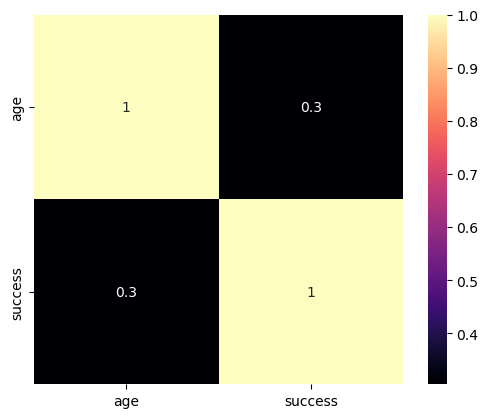

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix=df[['age','success']].corr()
sn.heatmap(corr_matrix,annot=True,cmap='magma',square=True)
plt.show()


In [ ]:
# In the above graph the heatmap graph display the success levels of two age groups across diffrent age points , the color of each cell which indicates the level of success and the darker color representing the higher success and lighter color represening lower success


In [33]:
#let checkc of the another heatmap using diffrent variable 

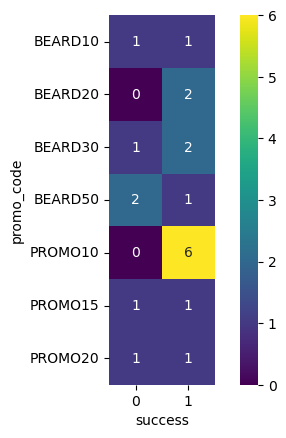

In [42]:

sn.heatmap(pd.crosstab(df['promo_code'], df['success']), annot=True, cmap='viridis', square=True)
plt.show()

In [25]:
#lets check what distplot says

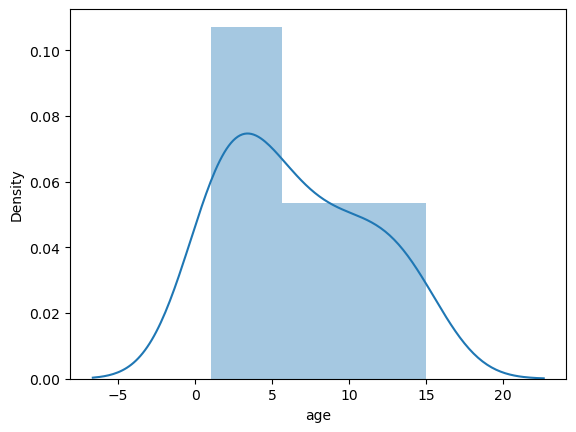

In [30]:
sn.distplot(df['age'])
plt.show()

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#The horizontal axis represents the age range, and the vertical axis represents the number of years.

In [31]:
#let check for the another graph what does it say

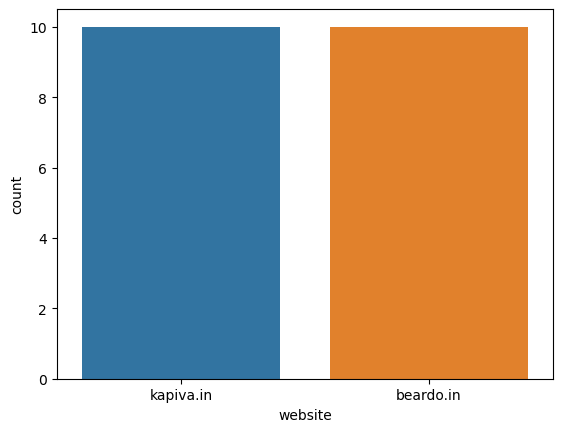

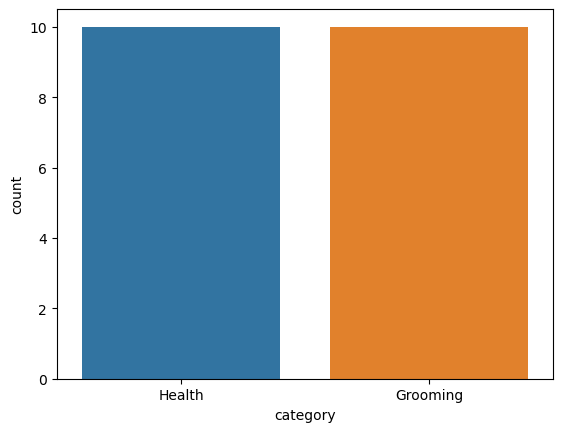

In [32]:
sn.countplot(x='website',data=df)
plt.show()
sn.countplot(x='category',data=df)
plt.show()

In [ ]:
#here in the graph we can see the category type that both the category crosspending to side by sidein the growth manner.

<Axes: xlabel='user_id', ylabel='age'>

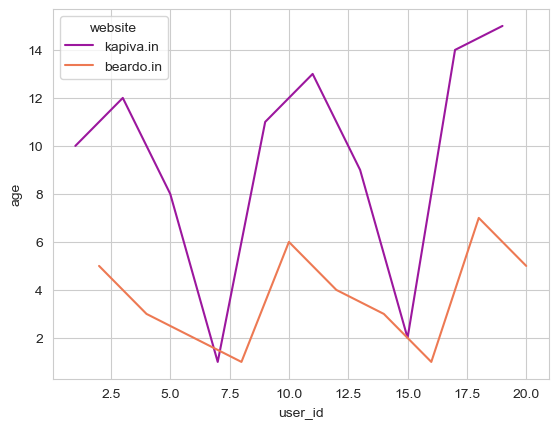

In [50]:
sn.lineplot(data=df.sort_values('user_id', ascending=True), x='user_id', y='age', hue='website', palette='plasma')

In [ ]:
#in this above graph we can see the line graph going in the trend

<Axes: xlabel='promo_code'>

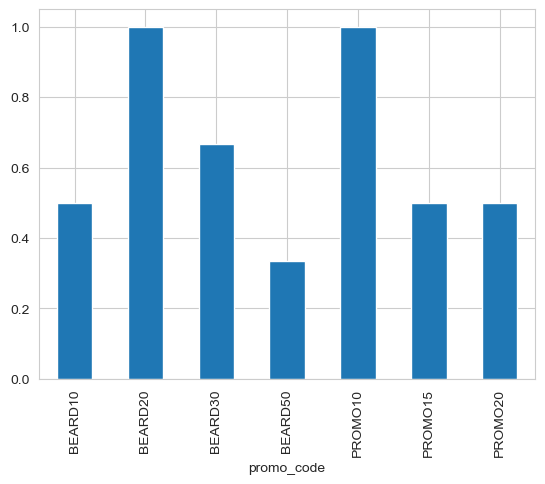

In [51]:
df.groupby('promo_code')['success'].mean().plot(kind='bar')

In [52]:
#let go for the scatterplot

<Axes: xlabel='age', ylabel='success'>

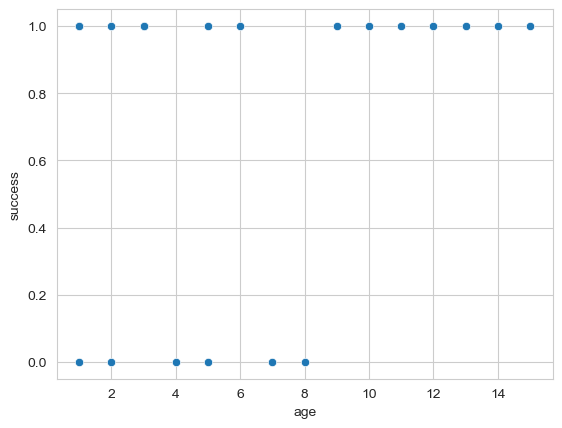

In [53]:
sn.scatterplot(x='age',y='success',data=df)

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# here we are doing categorial column into numerical column so tht our model give the accurate results 

In [57]:
le = LabelEncoder()
df['website'] = le.fit_transform(df['website'])
df['promo_code'] = le.fit_transform(df['promo_code'])
df['category'] = le.fit_transform(df['category'])


In [58]:
#let drop the user column
df.drop('user_id', axis=1, inplace=True)

In [59]:
# dividing the dataset into features (X) and target (y)
X = df.drop('success', axis=1)
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
# Make predictions
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

[[0 2]
 [0 2]]


In [69]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25
